In [2]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

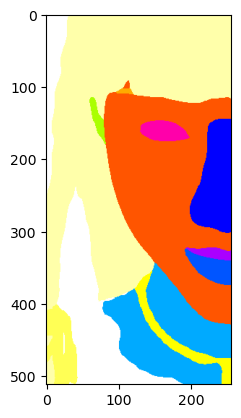

In [50]:
# For loading img and cutting the img into 2 half
# Read the image
# orig_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\segFixer\001.png')
seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\maskModifier\117.png')

cv2_image_masked = copy.deepcopy(seg_img)
# Determine the dimensions of the image
height, width,_ = cv2_image_masked.shape

# Crop the image to retain only the right half (assuming horizontal split)

# For 3 channel
right_half_face = cv2_image_masked[:, :width//2, :]
left_half_face = cv2_image_masked[:, width//2:, :]

# For 2 channel
# left_half_img = gray_image_mask[:, :width//2:]
# right_half_img = gray_image_mask[:, width//2:]

original_img = np.concatenate((right_half_face, left_half_face), axis=1)

# Plot the image
plt.imshow(right_half_face)
# plt.axis('off')  # Turn off axis
# plt.show()


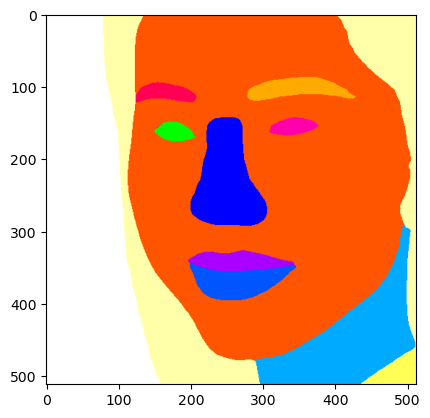

In [5]:
# Load the segmentation image
# seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\maskModifier\117.png')
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

def list_files_in_folder(folder_path):
    file_list = []
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the path is a file (not a directory)
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_list.append(file_name)
    return file_list

# Example usage:
folder_path = r"D:\Project\DPL302m\faceSegmantation\maskModifier\seg\makeup"
file_list = list_files_in_folder(folder_path)
for i in file_list:
    seg_img = cv2.imread(folder_path+f"\{i}")

    cv2_image_masked = copy.deepcopy(seg_img)
    # Determine the dimensions of the image
    height, width,_ = cv2_image_masked.shape

    # Crop the image to retain only the right half (assuming horizontal split)

    # For 3 channel
    right_half_face = cv2_image_masked[:, :width//2, :]
    left_half_face = cv2_image_masked[:, width//2:, :]

    # For 2 channel
    # left_half_img = gray_image_mask[:, :width//2:]
    # right_half_img = gray_image_mask[:, width//2:]

    original_img = np.concatenate((right_half_face, left_half_face), axis=1)

# Plot the image
    plt.imshow(right_half_face)
    color_mapping_ltr = {
        (255, 0, 170): (0, 255, 0),       #left_eye color to right_eye
        (255, 170, 0): (255, 0, 85)       #left_eyebrow color to right_eyebrow
    }
    color_mapping_rtl = {
        (0, 255, 0): (255, 0, 170),       #right_eye color to left_eye
        (255, 0, 85): (255, 170, 0)       #right_eyebrow color to left_eyebrow
    }

    # Replace old colors with new colors
    for old_color, new_color in color_mapping_ltr.items():
        right_half_face[np.all(right_half_face == old_color, axis=-1)] = new_color
    for old_color, new_color in color_mapping_rtl.items():
        left_half_face[np.all(left_half_face == old_color, axis=-1)] = new_color
    # Display the result
    original_img = np.concatenate((right_half_face, left_half_face), axis=1)
    # Plot the image
    plt.imshow(original_img)
    cv2.imwrite(r"D:\Project\DPL302m\faceSegmantation\segFixer\seg_fixed\makeup"+f"\{i}", original_img)


In [ ]:


# Replace old colors with new colors


# Display the result
cv2.imshow('Modified Segmentation Image', left_half_face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
right_eyebrow = np.array([255,   0, 85])
right_eye = np.array([  0, 255,   0])
left_eyebrow = np.array([255,   170, 0])
left_eye = ([255,0,170])
# Check if the color exists in the image
# left half must contain the right eyebrow and right eye
right_eyebrow_exist = np.any(np.all(left_half_face == right_eyebrow, axis=-1))
right_eye_exist = np.any(np.all(left_half_face == right_eye, axis=-1))
left_eyebrow_exist = np.any(np.all(left_half_face == left_eyebrow, axis=-1))
left_eye_exist = np.any(np.all(left_half_face == left_eye, axis=-1))

if right_eyebrow_exist and right_eye_exist:
    print(f"right_eyebrow and right_eye exists")
elif left_eyebrow_exist and left_eye_exist:
    print(f"left_eyebrow and left_eye exists")


left_eyebrow and left_eye exists


In [44]:
right_eyebrow = np.array([255,   0, 85])
right_eye = np.array([  0, 255,   0])
left_eyebrow = np.array([255,   170, 0])
left_eye = ([255,0,170])
# Check if the color exists in the image
# left half must contain the right eyebrow and right eye
right_eyebrow_exist = np.any(np.all(right_half_face == right_eyebrow, axis=-1))
right_eye_exist = np.any(np.all(right_half_face == right_eye, axis=-1))
left_eyebrow_exist = np.any(np.all(right_half_face == left_eyebrow, axis=-1))
left_eye_exist = np.any(np.all(right_half_face == left_eye, axis=-1))

if right_eyebrow_exist and right_eye_exist:
    print(f"right_eyebrow and right_eye exists")
elif left_eyebrow_exist and left_eye_exist:
    print(f"left_eyebrow and left_eye exists")

right_eyebrow and right_eye exists


[[  0,   0, 255],
 [  0,  85, 255],
 [  0, 170, 255],
 [170,   0, 255],
 [170, 255,   0],
 [255,   0, 170],
 [255,  85,   0],
 [255, 170,   0],
 [255, 255,  85],
 [255, 255, 170],
 [255, 255, 255]]


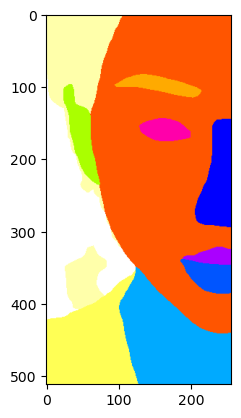

In [6]:
# seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\segFixer\001.png')
# seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\segFixer\output_color.png')

colors = np.unique(left_half_img.reshape(-1, left_half_img.shape[2]), axis=0)
colors = np.array2string(colors, separator=', ')
print(np.array(colors))
plt.imshow(left_half_img)

In [19]:
import cv2
import numpy as np

# Load the segmentation image
seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\maskModifier\117.png')

# Define the mapping from old colors to new colors
color_mapping = {
    (10,10,10): (255, 255, 170),  # hair
    ( 0,0,0): (255, 255, 255),  # background
    (0, 255, 170): (0,0,0),      # earring
    (255, 255, 0): (0, 170, 255),      # necklace
    (13,13,13): (0, 170, 255),      # neck
    # (0, 255, 85): (0, 255, 85),        # nope
    (12,12,12): ( 0, 255,  85 ),      # right ear
    (11,11,11): (170, 255,   0),             # left ear
    (5,5,5): (0, 255, 0),          # right eye
    (3,3,3): (255, 0, 85),        # right eyebrow
    (2,2,2): (255, 170, 0),      # left eyebrow
    (6,6,6): (0, 0, 255),          # nose
    (1,1,1): (255, 85, 0),        # face
    (4,4,4): (255, 0, 170),      # left eye
    (9,9,9): (0, 85, 255),        # lower lip
    (7,7,7): (170, 0, 255)       # upper lip
}

# Replace old colors with new colors
for old_color, new_color in color_mapping.items():
    seg_img[np.all(seg_img == old_color, axis=-1)] = new_color

# Display the result
cv2.imshow('Modified Segmentation Image', seg_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# Load the segmentation image
# seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\maskModifier\117.png')

# Define the mapping from old colors to new colors
color_mapping = {
    # (5,5,5): (0, 255, 0),          # right eye
    # (3,3,3): (255, 0, 85),        # right eyebrow
    # (2,2,2): (255, 170, 0),      # left eyebrow
    # (4,4,4): (255, 0, 170),      # left eye
    (255, 0, 170): (0, 255, 0),       #left_eye color to right_eye
    (255, 170, 0): (255, 0, 85)       #left_eyebrow color to right_eyebrow
}

# Replace old colors with new colors
for old_color, new_color in color_mapping.items():
    right_half_face[np.all(right_half_face == old_color, axis=-1)] = new_color

# Display the result
cv2.imshow('Modified Segmentation Image', right_half_face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# Load the segmentation image
# seg_img = cv2.imread(r'D:\Project\DPL302m\faceSegmantation\maskModifier\117.png')

# Define the mapping from old colors to new colors
color_mapping = {
    (0, 255, 0): (255, 0, 170),       #right_eye color to left_eye
    (255, 0, 85): (255, 170, 0)       #right_eyebrow color to left_eyebrow
}

# Replace old colors with new colors
for old_color, new_color in color_mapping.items():
    left_half_face[np.all(left_half_face == old_color, axis=-1)] = new_color

# Display the result
cv2.imshow('Modified Segmentation Image', left_half_face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
right_eyebrow = np.array([255,   0, 85])
right_eye = np.array([  0, 255,   0])
left_eyebrow = np.array([255,   170, 0])
left_eye = ([255,0,170])
# Check if the color exists in the image
# left half must contain the right eyebrow and right eye
right_eyebrow_exist = np.any(np.all(right_half_face == right_eyebrow, axis=-1))
right_eye_exist = np.any(np.all(right_half_face == right_eye, axis=-1))
left_eyebrow_exist = np.any(np.all(right_half_face == left_eyebrow, axis=-1))
left_eye_exist = np.any(np.all(right_half_face == left_eye, axis=-1))

if right_eyebrow_exist and right_eye_exist:
    print(f"right_eyebrow and right_eye exists")
elif left_eyebrow_exist and left_eye_exist:
    print(f"left_eyebrow and left_eye exists")

right_eyebrow and right_eye exists


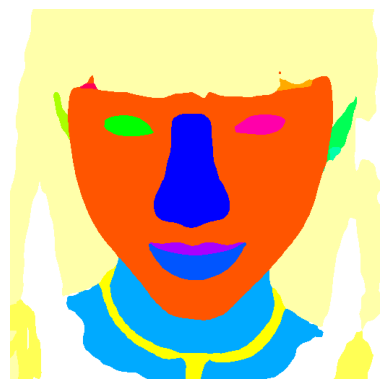

In [47]:
original_img = np.concatenate((right_half_face, left_half_face), axis=1)

# Plot the image
plt.imshow(original_img)
plt.axis('off')  # Turn off axis
plt.show()

In [48]:
right_eyebrow = np.array([255,   0, 85])
right_eye = np.array([  0, 255,   0])
left_eyebrow = np.array([255,   170, 0])
left_eye = ([255,0,170])
# Check if the color exists in the image
# left half must contain the right eyebrow and right eye
right_eyebrow_exist = np.any(np.all(original_img == right_eyebrow, axis=-1))
right_eye_exist = np.any(np.all(original_img == right_eye, axis=-1))
left_eyebrow_exist = np.any(np.all(original_img == left_eyebrow, axis=-1))
left_eye_exist = np.any(np.all(original_img == left_eye, axis=-1))

if right_eyebrow_exist and right_eye_exist:
    print(f"right_eyebrow and right_eye exists")
elif left_eyebrow_exist and left_eye_exist:
    print(f"left_eyebrow and left_eye exists")

right_eyebrow and right_eye exists
